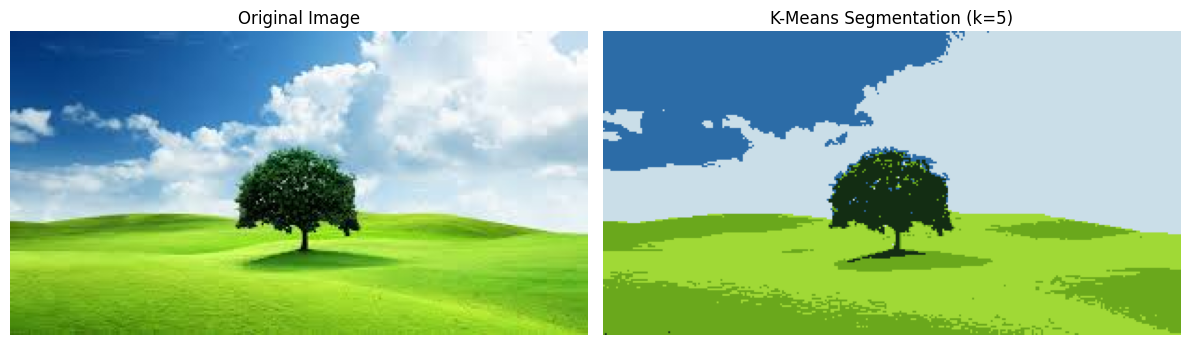

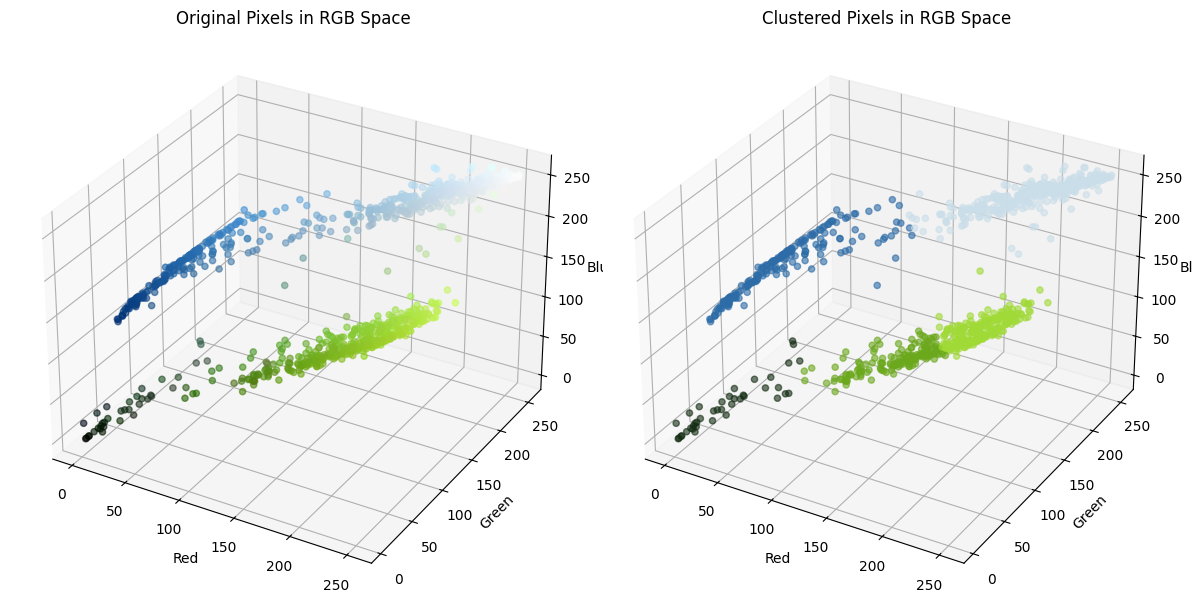

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Load the image
image = cv2.imread("segment.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
(h, w) = image.shape[:2]

# Reshape the image to a 2D array of RGB pixels
pixels = image.reshape((-1, 3))

# Apply KMeans clustering
k = 5 # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

# Replace each pixel with its cluster center
segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_pixels.reshape((h, w, 3)).astype(np.uint8)

# Plot the original and segmented image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"K-Means Segmentation (k={k})")
plt.imshow(segmented_image)
plt.axis("off")

plt.tight_layout()
plt.show()

# === 3D Visualization ===
# Sample 1000 random pixels for clarity
sample_idx = np.random.choice(pixels.shape[0], 1000, replace=False)
sample_pixels = pixels[sample_idx]
sample_labels = kmeans.labels_[sample_idx]

fig = plt.figure(figsize=(12, 6))

# Original pixel distribution
ax = fig.add_subplot(121, projection='3d')
ax.scatter(sample_pixels[:, 0], sample_pixels[:, 1], sample_pixels[:, 2],
           c=sample_pixels / 255.0, marker='o', alpha=0.6)
ax.set_title("Original Pixels in RGB Space")
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")

# Clustered pixel distribution
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(sample_pixels[:, 0], sample_pixels[:, 1], sample_pixels[:, 2],
            c=kmeans.cluster_centers_[sample_labels] / 255.0, marker='o', alpha=0.6)
ax2.set_title("Clustered Pixels in RGB Space")
ax2.set_xlabel("Red")
ax2.set_ylabel("Green")
ax2.set_zlabel("Blue")

plt.tight_layout()
plt.show()